# NLP Project: Recommendition Engine

## Step 1. import libraries

In [138]:
import sys
import spacy
import nltk
import pandas as pd
from itertools import combinations
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from emot.emo_unicode import *
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words()
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import wordnet
from nltk.corpus import words
import re
import itertools
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from nltk import pos_tag
from wordcloud import WordCloud
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')

## Step 2. Preprocessing

In [140]:
shows_df=pd.read_csv('df_titles.csv')

In [141]:
shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [142]:
stop_words = stopwords.words("english")
#stemmer = SnowballStemmer("english")
other_sw = ['oh','yeah','got','hey']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets
word_list = words.words() 

In [143]:
def clean_text(txt):

    if type(txt)!=str:
        txt=str(txt)
    txt=re.sub(r'[0-9]+','', txt)
    txt=txt.lower()
    

    tokens=word_tokenize(txt)
    lemma=WordNetLemmatizer()
    #l=[lemma.lemmatize(w) for w in tokens]
    l=[w for w in tokens if w not in stop_words]
    l=[w for w in l if w not in other_sw]
    l=[w for w in l if w in word_list]

    clean=[c for c in l if c not in string.punctuation]
    clean=' '.join(lemma.lemmatize(w) for w in clean)

    print(clean)
    return "".join(clean) 

In [144]:
shows_df['clean_description'] = shows_df['description'].apply(clean_text)

father end life death inventive comical way help face inevitable
crossing party cape town teen prove whether swimming star sister birth
protect family powerful drug lord skilled thief expert team violent deadly turf war
toilet talk go among justice center new gritty reality series
city coaching known train collegiate earnest unexceptional student navigate campus life
arrival charismatic young priest glorious ominous religious fervor dying town desperate believe
divided hero earth hoof heart determined prove
photo shoot model back time becomes plantation witness agony ancestral past
talented batch amateur face competition whipping best best
woman life loss feisty bird taken garden husband struggling find way forward
bold coalition trying bring organized crime accused
struggling earn living bangkok man emergency rescue service must unravel conspiracy
family terrorist young woman unknowingly joining group
clever new school anything fit queen bee among
following police job offer rare glimp

In [145]:
shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",father end life death inventive comical way he...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",crossing party cape town teen prove whether sw...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",toilet talk go among justice center new gritty...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,city coaching known train collegiate earnest u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",political cartoonist crime reporter pair inves...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",living alone spooky town young girl motley cre...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,looking survive world taken college student ur...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",dragged civilian life former superhero must tr...


In [146]:
stop_words = stopwords.words("english")
punc=list(punctuation)
word_list = words.words()

In [147]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            8807 non-null   object
 1   type               8807 non-null   object
 2   title              8807 non-null   object
 3   director           6173 non-null   object
 4   cast               7982 non-null   object
 5   country            7976 non-null   object
 6   date_added         8797 non-null   object
 7   release_year       8807 non-null   int64 
 8   rating             8803 non-null   object
 9   duration           8804 non-null   object
 10  listed_in          8807 non-null   object
 11  description        8807 non-null   object
 12  clean_description  8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


In [148]:
tv=['TV','tv']
shows_df['listed_in_clean']=shows_df['listed_in'].str.lower()
shows_df['listed_in_clean']=shows_df['listed_in_clean'].apply(word_tokenize)
shows_df['listed_in_clean']=shows_df['listed_in_clean'].apply(lambda x: [word for word in x if word not in tv])
shows_df['listed_in_clean']=shows_df['listed_in_clean'].apply(lambda x: [word for word in x if word not in punc])
shows_df['listed_in_clean']=shows_df['listed_in_clean'].apply(lambda x: ' '.join(x))

In [149]:
shows_df['cast_clean']=shows_df['cast'].str.lower()
shows_df['cast_clean']=shows_df['cast_clean'].astype(str)

shows_df['cast_clean']=shows_df['cast_clean'].apply(word_tokenize)
shows_df['cast_clean']=shows_df['cast_clean'].apply(lambda x: [word for word in x if word not in punc])
shows_df['cast_clean']=shows_df['cast_clean'].apply(lambda x: ' '.join(x))

In [150]:
shows_df['combined']=shows_df['clean_description']+' '+shows_df['listed_in_clean']+' '+shows_df['cast_clean']

## Step 3. Topic modeling

In [186]:
cv_tfidf=TfidfVectorizer()
corpus=shows_df['clean_description'].tolist()
cv_tfidf=TfidfVectorizer(stop_words="english")
X_tfidf=cv_tfidf.fit_transform(corpus).toarray()
dt_tfidf=pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zoom,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.377776,0.000000,0.0,0.0,0.0,0.0,0.0
8803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.398054,0.0,0.0,0.0,0.0,0.0
8804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [152]:
lsa = TruncatedSVD(10)
X_topic = lsa.fit_transform(X_tfidf) 
lsa.explained_variance_ratio_

array([0.00203365, 0.00348996, 0.00307125, 0.00295002, 0.00284286,
       0.00275392, 0.00251863, 0.00246381, 0.00231916, 0.00226736])

In [153]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())  
topic_word

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zoom,zorro
component_1,0.000,0.008,0.001,0.001,0.002,0.002,0.0,0.000,0.009,0.002,...,0.001,0.0,0.000,0.001,0.005,0.004,0.001,0.000,0.001,0.000
component_2,0.001,0.002,0.002,-0.001,-0.001,0.001,-0.0,-0.000,-0.004,-0.001,...,0.001,-0.0,-0.000,-0.000,-0.001,-0.000,-0.001,-0.001,-0.001,0.001
component_3,0.000,0.006,0.000,0.000,0.005,-0.001,-0.0,0.001,0.001,0.000,...,0.001,-0.0,0.000,-0.001,0.002,0.001,-0.000,-0.000,0.001,0.000
component_4,-0.000,-0.006,-0.001,-0.000,0.001,0.000,-0.0,-0.000,-0.002,-0.001,...,-0.001,-0.0,-0.001,-0.001,-0.007,0.000,-0.001,-0.001,-0.001,-0.000
component_5,-0.000,0.001,-0.000,-0.001,-0.002,0.000,-0.0,-0.001,0.003,-0.000,...,0.001,0.0,0.001,-0.001,0.001,-0.004,-0.001,-0.000,0.002,-0.000
component_6,-0.001,0.004,0.003,0.001,-0.001,0.000,0.0,0.000,-0.000,-0.000,...,0.000,0.0,0.000,0.000,-0.004,-0.005,-0.000,0.000,0.001,-0.000
component_7,-0.000,-0.001,-0.002,-0.000,-0.001,-0.001,0.0,0.000,-0.008,-0.001,...,-0.000,-0.0,0.000,0.002,0.000,-0.004,0.002,0.000,0.001,0.000
component_8,-0.000,-0.007,0.000,-0.001,-0.001,-0.001,-0.0,0.000,0.008,0.002,...,-0.001,-0.0,-0.000,-0.002,0.001,0.002,0.000,-0.000,-0.001,-0.000
component_9,-0.002,-0.002,0.002,0.001,-0.002,-0.002,0.0,-0.000,-0.003,-0.003,...,0.002,-0.0,-0.001,-0.002,-0.003,-0.002,-0.002,0.000,-0.001,0.001
component_10,0.002,-0.007,-0.002,0.001,-0.000,-0.001,0.0,-0.000,0.005,-0.002,...,-0.004,-0.0,-0.000,-0.000,0.001,-0.001,-0.001,0.001,-0.000,-0.000


In [154]:
def print_topics(model, feature_names, num_words):
    for ix, topic in enumerate(model.components_):
        print("\nTopic", ix)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-num_words - 1:-1]]))

In [155]:
print_topics(lsa,cv_tfidf.get_feature_names(),10)


Topic 0
life, young, new, family, man, woman, love, world, father, series

Topic 1
young, man, woman, father, love, son, mother, daughter, husband, marriage

Topic 2
new, school, high, teen, student, york, help, home, city, friend

Topic 3
life, love, school, high, student, romance, college, come, teacher, fall

Topic 4
new, life, york, city, woman, home, husband, special, wife, comedian

Topic 5
family, home, father, son, series, time, mother, turn, daughter, brother

Topic 6
love, series, true, story, based, new, couple, fall, home, romance

Topic 7
world, family, love, way, save, war, life, girl, friend, make

Topic 8
young, woman, documentary, family, world, school, new, high, history, student

Topic 9
documentary, man, love, girl, new, family, history, look, footage, fall


In [156]:
cv = CountVectorizer(stop_words = 'english')
X_cv = cv.fit_transform(shows_df.clean_description)

In [157]:
tw = cv.get_feature_names()
cv_df = pd.DataFrame(X_cv.toarray(), columns=tw)
cv_df

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zoom,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
nmf = NMF(n_components=10, random_state=42)
nmf.fit(X_tfidf)

print_topics(nmf,cv_tfidf.get_feature_names(),10)


Topic 0
series, comedy, based, reality, true, story, group, animated, special, home

Topic 1
young, woman, husband, boy, couple, marriage, home, father, mother, girl

Topic 2
school, high, teen, student, best, college, teacher, group, girl, romance

Topic 3
life, come, career, personal, death, comic, turn, comedian, film, job

Topic 4
new, york, city, home, help, town, soon, past, old, couple

Topic 5
family, home, father, son, time, business, brother, wealthy, drama, turn

Topic 6
love, true, fall, romance, story, girl, triangle, different, college, childhood

Topic 7
world, war, save, way, evil, fight, help, mysterious, make, group

Topic 8
documentary, history, footage, look, legendary, career, film, intimate, rise, culture

Topic 9
man, wife, daughter, father, murder, help, son, death, crime, friend


In [159]:
nmf.fit(X_cv)
print_topics(nmf,cv.get_feature_names(),10)


Topic 0
new, york, city, home, help, town, old, soon, past, couple

Topic 1
young, boy, girl, couple, mother, help, marriage, men, father, soon

Topic 2
life, come, career, death, turn, comic, personal, way, crime, film

Topic 3
family, home, father, son, brother, time, turn, business, wealthy, drama

Topic 4
world, war, save, way, mysterious, help, fight, evil, dark, explore

Topic 5
love, true, fall, romance, girl, story, triangle, daughter, journey, couple

Topic 6
school, high, teen, student, girl, group, best, team, college, romance

Topic 7
man, father, wife, daughter, murder, friend, crime, son, old, brother

Topic 8
series, documentary, based, true, comedy, story, reality, group, history, people

Topic 9
woman, husband, father, home, son, mysterious, help, past, friend, revenge


In [160]:
topic_words = pd.DataFrame(nmf.components_.round(5),
             index = ["component_1","component_2",
                     "component_3","component_4",
                     "component_5","component_6",
                     "component_7","component_8",
                     "component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_words

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zoom,zorro
component_1,0.00000,0.01846,0.00000,0.00000,0.00770,0.00000,0.00002,0.00000,0.01915,0.00000,...,0.00004,0.00018,0.00128,0.00000,0.00979,0.00000,0.00013,0.00004,0.01059,0.00000
component_2,0.00000,0.00774,0.00000,0.00000,0.00000,0.00604,0.00000,0.00025,0.00402,0.00000,...,0.00000,0.00000,0.00018,0.00000,0.00220,0.00957,0.00001,0.00000,0.00000,0.00601
component_3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00481,0.00000,0.00000,0.01537,0.00522,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00309,0.00000,0.00000,0.00000,0.00000
component_4,0.00000,0.00666,0.00648,0.00034,0.00000,0.00000,0.00003,0.00000,0.00788,0.00037,...,0.00000,0.00017,0.00000,0.00000,0.00000,0.00000,0.00049,0.00000,0.00000,0.00000
component_5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00022,0.00007,0.02312,0.00216,...,0.00000,0.00003,0.00023,0.00000,0.00983,0.01064,0.00101,0.00012,0.00000,0.00000
component_6,0.00000,0.00000,0.00000,0.00000,0.00004,0.00000,0.00012,0.00053,0.00000,0.00000,...,0.00000,0.00000,0.00030,0.00122,0.00000,0.00000,0.00154,0.00004,0.00000,0.00000
component_7,0.00000,0.01405,0.00000,0.00784,0.01636,0.00000,0.00000,0.00227,0.01152,0.00276,...,0.00016,0.00002,0.00025,0.00000,0.00273,0.01242,0.00069,0.00000,0.00000,0.00000
component_8,0.00826,0.00000,0.00000,0.00000,0.00128,0.00000,0.00000,0.00001,0.02134,0.00000,...,0.00000,0.00000,0.00000,0.00050,0.01593,0.00445,0.00000,0.00000,0.00000,0.00000
component_9,0.00000,0.01384,0.00000,0.00293,0.00000,0.00000,0.00064,0.00007,0.00000,0.00046,...,0.00016,0.00041,0.00044,0.00450,0.00434,0.00000,0.00324,0.00075,0.00074,0.00000
component_10,0.00000,0.02517,0.01017,0.00078,0.00021,0.00000,0.00000,0.00065,0.00000,0.00000,...,0.01122,0.00000,0.00000,0.00000,0.00608,0.00000,0.00000,0.00000,0.00000,0.00000


In [161]:
shows_df['description2']=shows_df['description'].str.lower()
shows_df['description2']=shows_df['description2'].apply(word_tokenize)
shows_df['description2']=shows_df['description2'].apply(lambda x: [word for word in x if word not in stop_words])
shows_df['description2']=shows_df['description2'].apply(lambda x: [word for word in x if word not in punc])
shows_df['description2']=shows_df['description2'].apply(lambda x: list(set(x)))

In [162]:
shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_description,listed_in_clean,cast_clean,combined,description2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",father end life death inventive comical way he...,documentaries,nan,father end life death inventive comical way he...,"[stages, kirsten, father, inventive, ways, lif..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",crossing party cape town teen prove whether sw...,international shows dramas mysteries,ama qamata khosi ngema gail mabalane thabang m...,crossing party cape town teen prove whether sw...,"[whether, swimming, prove, paths, sets, crossi..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...,crime shows international shows action adventure,sami bouajila tracy gotoas samuel jouy nabiha ...,protect family powerful drug lord skilled thie...,"[pulled, powerful, deadly, skilled, family, ex..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",toilet talk go among justice center new gritty...,docuseries reality,nan,toilet talk go among justice center new gritty...,"[go, gritty, incarcerated, toilet, feuds, amon..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,city coaching known train collegiate earnest u...,international shows romantic shows comedies,mayur more jitendra kumar ranjan raj alam khan...,city coaching known train collegiate earnest u...,"[earnest, known, ’, unexceptional, finest, stu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",political cartoonist crime reporter pair inves...,cult movies dramas thrillers,mark ruffalo jake gyllenhaal robert downey jr....,political cartoonist crime reporter pair inves...,"[thriller, zodiac, based, francisco, reporter,..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",living alone spooky town young girl motley cre...,kids korean shows comedies,nan,living alone spooky town young girl motley cre...,"[diverse, personalities, befriends, girl, youn..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,looking survive world taken college student ur...,comedies horror movies,jesse eisenberg woody harrelson emma stone abi...,looking survive world taken college student ur...,"[sisters, world, zombies, survive, taken, stud..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",dragged civilian life former superhero must tr...,children family movies comedies,tim allen courteney cox chevy chase kate mara ...,dragged civilian lif

In [163]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [164]:
import random

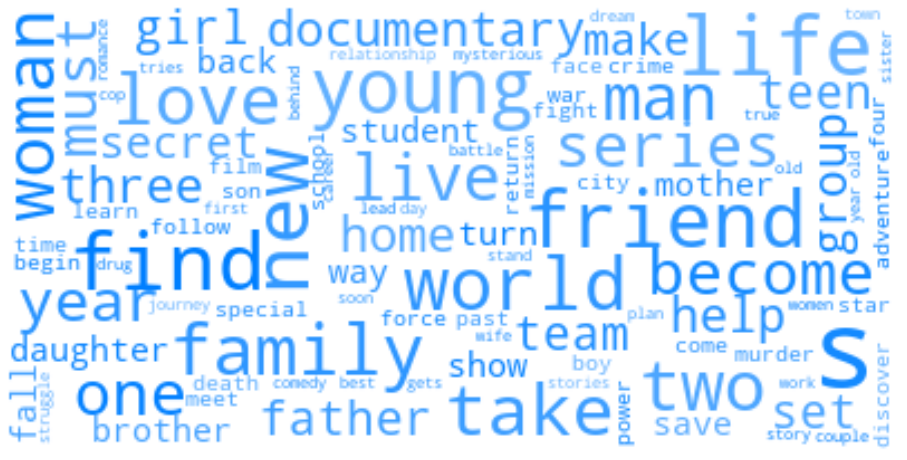

In [165]:
lst = shows_df['description2'].tolist()
lst = list(itertools.chain(*lst))
description = ' '.join(lst)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color='white',max_font_size=50, max_words=100).generate(description)
plt.imshow(wordcloud.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
#plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [166]:
word_matrix = cv_tfidf.fit_transform(shows_df['clean_description'])

topic_matrix = nmf.transform(word_matrix)
topic_matrix_df = pd.DataFrame(topic_matrix).add_prefix('topic_')

topic_matrix_df[['title','description', 'clean_description']] = shows_df[['title','description', 'clean_description']]
topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,title,description,clean_description
0,0.002261,0.003401,0.044850,0.004940,0.005669,0.001735,0.005550,0.007530,0.000102,0.006784,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",father end life death inventive comical way he...
1,0.001650,0.001200,0.001020,0.003136,0.001331,0.001902,0.016743,0.001437,0.003015,0.002285,Blood & Water,"After crossing paths at a party, a Cape Town t...",crossing party cape town teen prove whether sw...
2,0.000646,0.001584,0.001128,0.036815,0.009958,0.000000,0.003410,0.001897,0.004541,0.000000,Ganglands,To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,0.024256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044502,0.000000,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",toilet talk go among justice center new gritty...
4,0.002724,0.000433,0.036163,0.000000,0.001473,0.001528,0.007928,0.000000,0.000246,0.000000,Kota Factory,In a city of coaching centers known to train I...,city coaching known train collegiate earnest u...


In [167]:
def get_top_descriptions(topic_label):
    for i in topic_matrix_df.sort_values(by=topic_label, ascending=False).head(10)['description'].values:
        print(i)
        print()

In [168]:
t_lst=['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']
for topic_num in t_lst:
    print(topic_num)
    get_top_descriptions(topic_num)

topic_0
New friends, new loves and new experiences mix together inside a colorful college dormitory in Korea that's home to students from around the world.

Vik meets new friends in a new city, where they go on exciting adventures together with a magical being. But soon, his family must move again.

It's a whole new world for Arlo and his one-of-a kind pals when they set out to restore a run-down New York City neighborhood — and make it their own.

After 30 years with the New York City Ballet, celebrated dancer Wendy Whelan redefines herself as an artist in a new stage of life.

Amped up with powers that make them faster, stronger and more agile than ever, the Dinotrux are back to face new challenges and meet new friends.

The new Head of Values at the BBC deals with redefining the company's purpose, events like the arrival of Prince Charles and issues with new programs.

After moving from New York City to a small town in Washington state, an interracial couple and their preteen son st

In [169]:
shows_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'clean_description', 'listed_in_clean', 'cast_clean', 'combined',
       'description2'],
      dtype='object')

In [170]:
small_df=shows_df.drop(['show_id', 'type','director', 'cast','date_added','release_year',
                          'rating', 'duration', 'listed_in','description',
                         'description2'],axis=1)

In [171]:
small_df.country.value_counts()

United States                                   2818
India                                            972
United Kingdom                                   419
Japan                                            245
South Korea                                      199
                                                ... 
Pakistan, Norway, United States                    1
United Kingdom, China                              1
United Kingdom, France, Spain, United States       1
United Kingdom, Singapore                          1
United Kingdom, Poland                             1
Name: country, Length: 748, dtype: int64

In [172]:
small_df.combined.head()

0    father end life death inventive comical way he...
1    crossing party cape town teen prove whether sw...
2    protect family powerful drug lord skilled thie...
3    toilet talk go among justice center new gritty...
4    city coaching known train collegiate earnest u...
Name: combined, dtype: object

In [173]:
small_df['clean_description']=small_df['clean_description'].fillna('')
small_df['listed_in_clean']=small_df['listed_in_clean'].fillna('')

In [174]:
tfidf_matrix=cv_tfidf.fit_transform(small_df['combined'])
#tfidf_matrix_li=cv_tfidf2.fit_transform(small_df['listed_in_clean'])

In [175]:
tfidf_matrix.shape

(8807, 39745)

In [176]:
cv_tfidf.get_feature_names()

['10',
 '18',
 '2mex',
 '2na',
 '390',
 '40',
 '4minute',
 '50',
 '9m88',
 'aabhas',
 'aachal',
 'aacharekar',
 'aadarsh',
 'aadhi',
 'aadhya',
 'aadil',
 'aaditi',
 'aaditya',
 'aadukalam',
 'aadya',
 'aahana',
 'aakarshan',
 'aakash',
 'aakeel',
 'aakshath',
 'aala',
 'aamina',
 'aamir',
 'aanand',
 'aanchal',
 'aarab',
 'aarav',
 'aarden',
 'aarif',
 'aarjav',
 'aarna',
 'aarohi',
 'aaron',
 'aarti',
 'aarubala',
 'aarushi',
 'aarya',
 'aaryan',
 'aaryansh',
 'aarón',
 'aasha',
 'aashay',
 'aashi',
 'aashif',
 'aashish',
 'aasif',
 'aayam',
 'aayan',
 'abad',
 'abadie',
 'abaitua',
 'abana',
 'abandon',
 'abandoned',
 'abandonment',
 'abarca',
 'abargil',
 'abascal',
 'abayomi',
 'abba',
 'abbad',
 'abbas',
 'abbasi',
 'abbasova',
 'abbass',
 'abbey',
 'abbi',
 'abbie',
 'abbington',
 'abbott',
 'abboud',
 'abboudy',
 'abburi',
 'abby',
 'abd',
 'abdalah',
 'abdalla',
 'abdallah',
 'abdeen',
 'abdel',
 'abdelaziz',
 'abdelghani',
 'abdelghany',
 'abdelhafiz',
 'abdelhaq',
 'abdelila

In [177]:
co_sim=linear_kernel(tfidf_matrix, tfidf_matrix)

## Step 4. Cosine similarity

In [178]:
co_sim.shape

(8807, 8807)

In [179]:
indcs=pd.Series(small_df.index, index=small_df['title']).drop_duplicates()

In [180]:
def rec(title, cosine_sim=co_sim):
    idx=indcs[title]
    similarity=list(enumerate(cosine_sim[idx]))
    similarity=sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity=similarity[1:11]
    idxs=[i[0] for i in similarity]
    #return small_df['title'].iloc[idxs]
    
    return_items=small_df['title'].iloc[idxs]
    recommended_movies = []
    for t in return_items:
        recommended_movies.append(t)
        print(t)
        
    return recommended_movies

In [181]:
rec("The 100")

The Search for Life in Space
Rememory
Star Trek: Deep Space Nine
3022
IO
Iron Sky: The Coming Race
Planet Earth II
Benchwarmers 2: Breaking Balls
Steam Team to the Rescue
Lost in Space


['The Search for Life in Space',
 'Rememory',
 'Star Trek: Deep Space Nine',
 '3022',
 'IO',
 'Iron Sky: The Coming Race',
 'Planet Earth II',
 'Benchwarmers 2: Breaking Balls',
 'Steam Team to the Rescue',
 'Lost in Space']

In [182]:
small_df["title"]=small_df["title"].str.lower()

In [183]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              8807 non-null   object
 1   country            7976 non-null   object
 2   clean_description  8807 non-null   object
 3   listed_in_clean    8807 non-null   object
 4   cast_clean         8807 non-null   object
 5   combined           8807 non-null   object
dtypes: object(6)
memory usage: 413.0+ KB


In [184]:
small_df.to_csv('df-for-app.csv')

In [185]:
shows_df.to_csv('df-final.csv')